<a href="https://colab.research.google.com/github/luccouv/bigdata-boston-crimes/blob/master/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

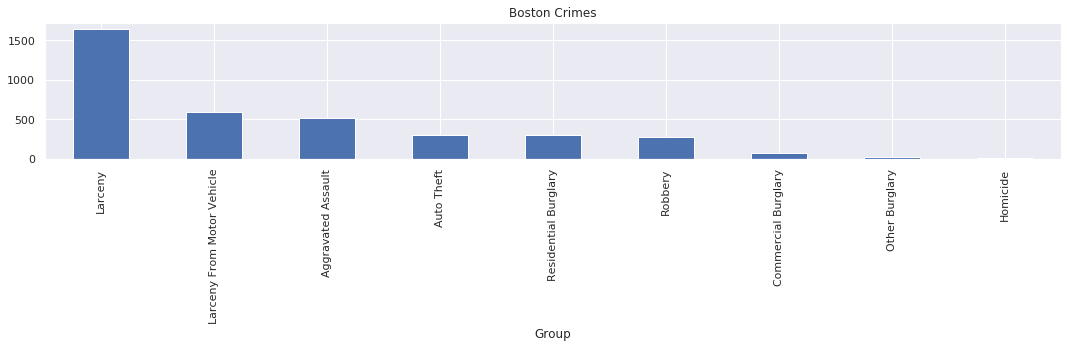

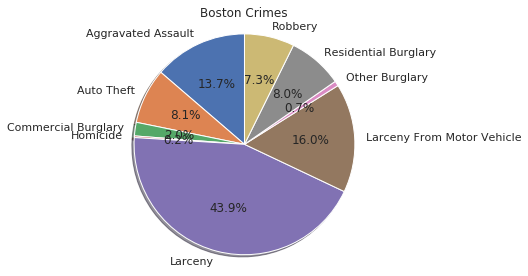

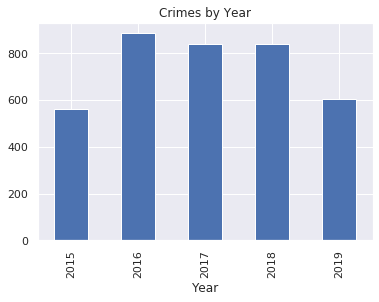

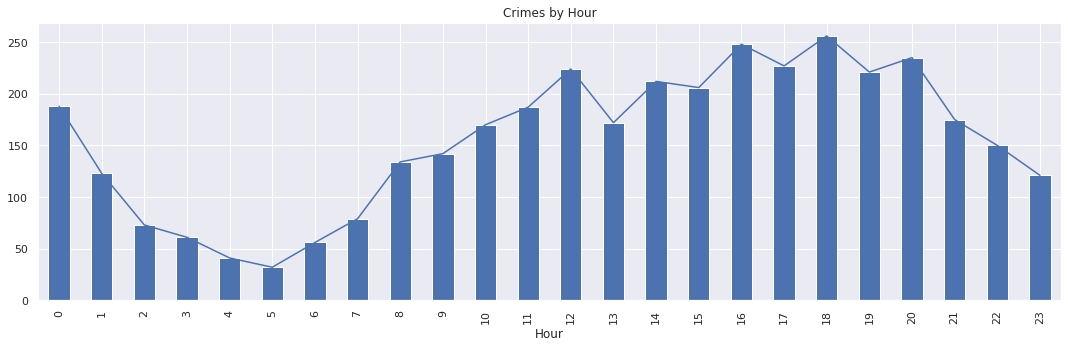

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


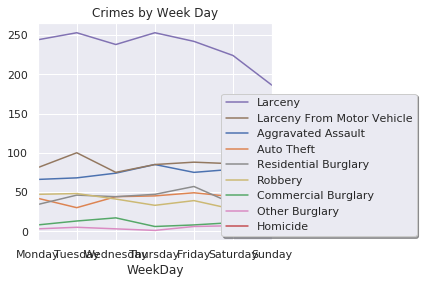

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:114: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


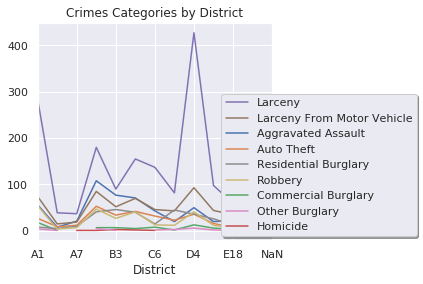

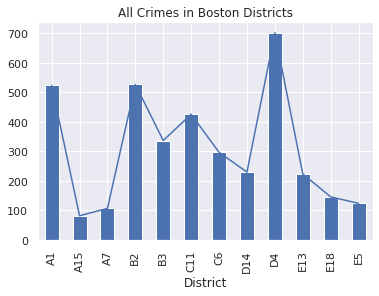

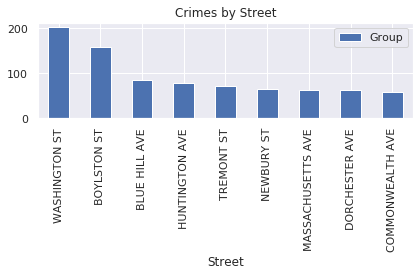

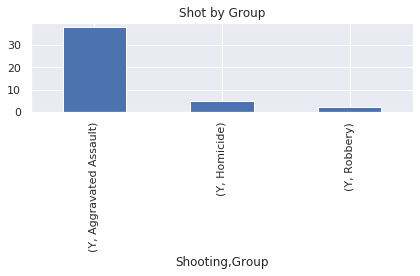

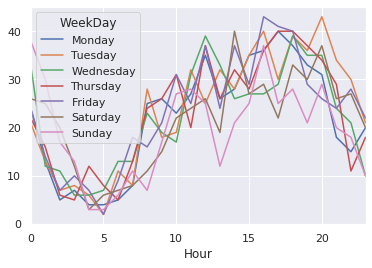

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

from pylab import subplot

sns.set()

data = pd.read_csv("./short2.csv")
#data = pd.read_csv("./short.csv")

data = data.loc[data['UCR_PART'] == 'Part One']

data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])
data['DAY'] = data['OCCURRED_ON_DATE'].dt.day

data = data.drop(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'UCR_PART', 'Location'], axis=1)

new = {'OFFENSE_CODE_GROUP':'Group',
         'OFFENSE_DESCRIPTION':'Description',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'WeekDay',
         'HOUR':'Hour',
         'STREET':'Street',
         'OCCURRED_ON_DATE':'date',
         'DAY':'Day'}
data.rename(index=str, columns=new, inplace=True)

data = data[['Group', 'date', 'Description', 'Shooting', 'Year', 'Month', 'Day', 'WeekDay', 'Hour', 'Area', 'District', 'Street', 'Lat', 'Long' ]]

data['Lat'].replace("-1", np.nan, inplace=True)
data['Long'].replace("-1", np.nan, inplace=True)
data['Area'].replace(" ", np.nan, inplace=True)
data.fillna("NaN", inplace=True)

data['WeekDay'] = pd.Categorical(data['WeekDay'], 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

year = data.groupby(['Year'])['Group'].count()
group = data.groupby(['Group'])['Year'].count()
hour = data.groupby(['Hour'])['Description'].count()
district = data.groupby(["District","Group"])["Hour"].count().unstack()
all_crimes_district = data.groupby(['District'])['Group'].count()
all_crimes_district.drop(index = "NaN", inplace = True)
shoot = data.groupby(["District","Shooting"])["Hour"].count().unstack()
shoot.drop(columns = "NaN", inplace = True)
shoot.drop(index = "NaN", inplace = True)

shooter = data.groupby(['Shooting', 'Group'])['Hour'].count()
shooter.drop(index = "NaN", inplace = True)

street = data.groupby(['Street'])['Group'].count()
street = street[street > 50]
street.drop(index = "NaN", inplace = True)

day = data.groupby(['Hour','WeekDay'])['Group'].count().unstack()
month = data.groupby(["date","Month"])["Group"].count().unstack()
grouped = data.groupby(['WeekDay','Group'])['Description'].count().unstack()

sortedValues = group.sort_values(ascending=False)
sortedValues.plot(kind='bar', figsize=(15,5))
plt.title('Boston Crimes')
plt.tight_layout()
plt.show()

labels = []
for part in group.index.array:
   labels.append(part)
#explode = (0, 0, 0, 0, 0.1, 0, 0, 0, 0)  
plt.pie(group, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Boston Crimes')
plt.tight_layout()
plt.show()

year.plot(kind='bar')
plt.title('Crimes by Year')
plt.show()

hour.plot()
hour.plot(kind='bar', figsize=(15,5))
plt.title('Crimes by Hour')
plt.tight_layout()
plt.show()

grouped.plot()
ax = plt.subplot(111)
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
current_handles, current_labels = plt.gca().get_legend_handles_labels()
dict = {}
cnt = 0
for i in current_handles:
   dict.update({current_labels[cnt] : i})
   cnt = cnt + 1
nom = data.groupby(['Group'])['WeekDay'].count().sort_values(ascending=False).index.array
dict_trie = {}
for i in nom:
   handle = dict.get(i)
   dict_trie.update({i : handle})
labels = [*dict_trie]
handles = list(dict_trie.values())
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.2, 0.7), shadow=True)
plt.title('Crimes by Week Day')
plt.show()

district.plot()
ax = plt.subplot(111)
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
current_handles, current_labels = plt.gca().get_legend_handles_labels()
dict = {}
cnt = 0
for i in current_handles:
   dict.update({current_labels[cnt] : i})
   cnt = cnt + 1
dist = data.groupby(['Group'])['District'].count().sort_values(ascending=False).index.array
dict_trie = {}
for i in nom:
   handle = dict.get(i)
   dict_trie.update({i : handle})
labels = [*dict_trie]
handles = list(dict_trie.values())
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.2, 0.7), shadow=True)
plt.title('Crimes Categories by District')
plt.show()

all_crimes_district.plot()
plt.title('All Crimes in Boston Districts')
all_crimes_district.plot(kind='bar')
all_crimes_district = all_crimes_district.sort_values(ascending=False)
plt.show()

street = street.sort_values(ascending=False)
street.plot(kind='bar')
plt.legend()
plt.title('Crimes by Street')
plt.tight_layout()
plt.show()

shooter.plot(kind='bar')
plt.title('Shot by Group')
plt.tight_layout()
plt.show()

day.plot()
plt.show()